Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-24352ffbf711>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['run', 'V(vout)'])


Archivo cargado correctamente
                     run       V(vout)
0                    run      V(vout2)
1  1.000000000000000e+00  3.595060e-02
2  2.000000000000000e+00  3.601470e-02
3  3.000000000000000e+00  3.596668e-02
4  4.000000000000000e+00  3.601015e-02


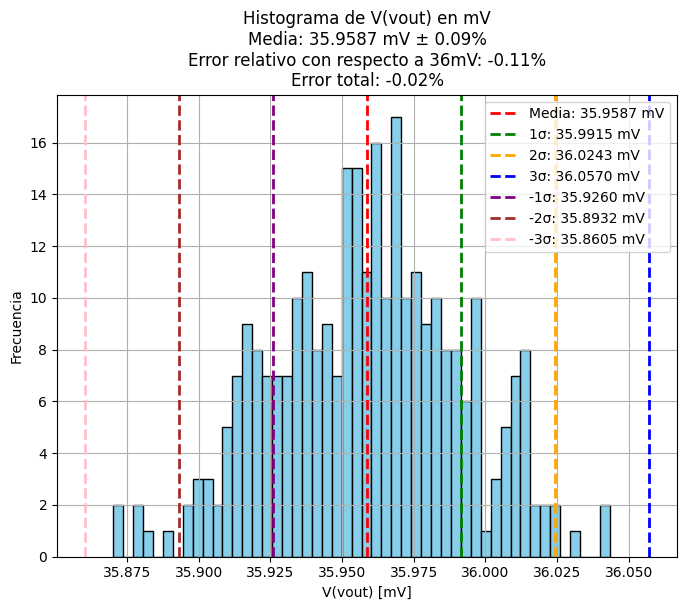

In [8]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/Proyecto_final_DSE/Preamp_mc_mA_max.txt'  # Ruta actualizada

# Paso 2: Leer el archivo .txt y verificar que se está leyendo correctamente
try:
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['run', 'V(vout)'])
    print("Archivo cargado correctamente")
    print(data.head())  # Mostrar las primeras filas para verificar
except Exception as e:
    print(f'Error al leer el archivo: {e}')
    data = None  # En caso de error, se asegura que la variable 'data' esté definida como None

# Verificar que 'data' no es None antes de continuar
if data is not None:
    # Paso 3: Convertir los valores de 'V(vout)' a numéricos
    data['V(vout)'] = pd.to_numeric(data['V(vout)'], errors='coerce')

    # Ajustar las unidades de V(vout) a milivoltios
    data['V(vout)_mV'] = data['V(vout)'] * 1000  # Convertir a milivoltios

    # Paso 4: Cálculo de estadísticas
    mean_vout = data['V(vout)_mV'].mean()  # Media
    std_vout = data['V(vout)_mV'].std()    # Desviación estándar

    # Calcular el error en porcentaje respecto a la media
    percent_error = (std_vout / mean_vout) * 100  # Error porcentual

    # Valor ideal esperado de V(vout) en milivoltios (390 µV)
    expected_value = 36  # mV

    # Calcular el error relativo respecto al valor esperado
    relative_error = ((mean_vout - expected_value) / expected_value) * 100  # Error relativo en porcentaje

    # Calcular el error total (suma del error de la media y el error estándar)
    total_error = percent_error + relative_error

    # Paso 5: Calcular sigma y negativos
    sigma_1 = mean_vout + std_vout
    sigma_2 = mean_vout + 2 * std_vout
    sigma_3 = mean_vout + 3 * std_vout
    sigma_neg_1 = mean_vout - std_vout
    sigma_neg_2 = mean_vout - 2 * std_vout
    sigma_neg_3 = mean_vout - 3 * std_vout

    # Paso 6: Crear histograma
    plt.figure(figsize=(8, 6))
    plt.hist(data['V(vout)_mV'], bins=50, color='skyblue', edgecolor='black')

    # Ploteamos las líneas para la media y sigmas
    plt.axvline(mean_vout, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_vout:.4f} mV')
    plt.axvline(sigma_1, color='green', linestyle='dashed', linewidth=2, label=f'1σ: {sigma_1:.4f} mV')
    plt.axvline(sigma_2, color='orange', linestyle='dashed', linewidth=2, label=f'2σ: {sigma_2:.4f} mV')
    plt.axvline(sigma_3, color='blue', linestyle='dashed', linewidth=2, label=f'3σ: {sigma_3:.4f} mV')
    plt.axvline(sigma_neg_1, color='purple', linestyle='dashed', linewidth=2, label=f'-1σ: {sigma_neg_1:.4f} mV')
    plt.axvline(sigma_neg_2, color='brown', linestyle='dashed', linewidth=2, label=f'-2σ: {sigma_neg_2:.4f} mV')
    plt.axvline(sigma_neg_3, color='pink', linestyle='dashed', linewidth=2, label=f'-3σ: {sigma_neg_3:.4f} mV')

    # Títulos y etiquetas
    plt.title(f'Histograma de V(vout) en mV\nMedia: {mean_vout:.4f} mV ± {percent_error:.2f}%\nError relativo con respecto a 36mV: {relative_error:.2f}%\nError total: {total_error:.2f}%')
    plt.xlabel('V(vout) [mV]')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No se pudo cargar el archivo. Verifica la ruta y el formato del archivo.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo cargado correctamente
                     run       V(vout)
0                    run      V(vout2)
1  1.000000000000000e+00  3.488564e-05
2  2.000000000000000e+00  3.494940e-05
3  3.000000000000000e+00  3.490279e-05
4  4.000000000000000e+00  3.494430e-05


<ipython-input-9-b14ddc5a41a3>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['run', 'V(vout)'])


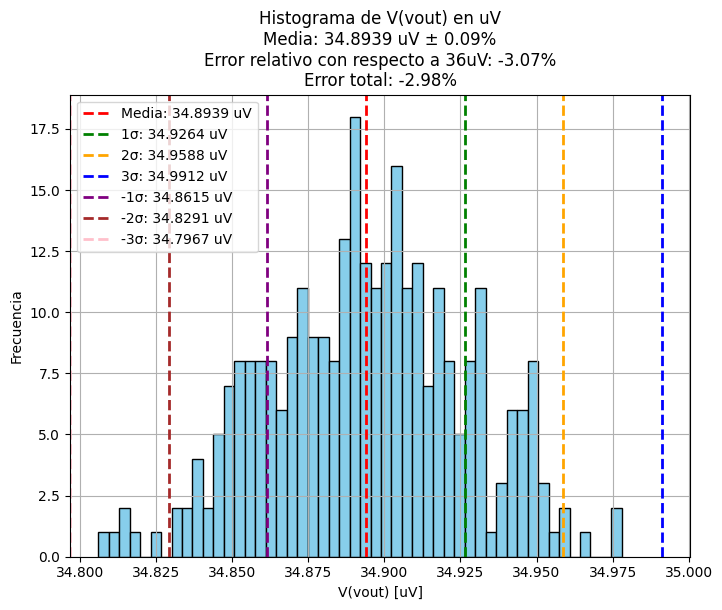

In [9]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/Proyecto_final_DSE/Preamp_mc_mA_min.txt'  # Ruta actualizada

# Paso 2: Leer el archivo .txt y verificar que se está leyendo correctamente
try:
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['run', 'V(vout)'])
    print("Archivo cargado correctamente")
    print(data.head())  # Mostrar las primeras filas para verificar
except Exception as e:
    print(f'Error al leer el archivo: {e}')
    data = None  # En caso de error, se asegura que la variable 'data' esté definida como None

# Verificar que 'data' no es None antes de continuar
if data is not None:
    # Paso 3: Convertir los valores de 'V(vout)' a numéricos
    data['V(vout)'] = pd.to_numeric(data['V(vout)'], errors='coerce')

    # Ajustar las unidades de V(vout) a milivoltios
    data['V(vout)_uV'] = data['V(vout)'] * 1000000  # Convertir a milivoltios

    # Paso 4: Cálculo de estadísticas
    mean_vout = data['V(vout)_uV'].mean()  # Media
    std_vout = data['V(vout)_uV'].std()    # Desviación estándar

    # Calcular el error en porcentaje respecto a la media
    percent_error = (std_vout / mean_vout) * 100  # Error porcentual

    # Valor ideal esperado de V(vout) en milivoltios (390 µV)
    expected_value = 36  # uV

    # Calcular el error relativo respecto al valor esperado
    relative_error = ((mean_vout - expected_value) / expected_value) * 100  # Error relativo en porcentaje

    # Calcular el error total (suma del error de la media y el error estándar)
    total_error = percent_error + relative_error

    # Paso 5: Calcular sigma y negativos
    sigma_1 = mean_vout + std_vout
    sigma_2 = mean_vout + 2 * std_vout
    sigma_3 = mean_vout + 3 * std_vout
    sigma_neg_1 = mean_vout - std_vout
    sigma_neg_2 = mean_vout - 2 * std_vout
    sigma_neg_3 = mean_vout - 3 * std_vout

    # Paso 6: Crear histograma
    plt.figure(figsize=(8, 6))
    plt.hist(data['V(vout)_uV'], bins=50, color='skyblue', edgecolor='black')

    # Ploteamos las líneas para la media y sigmas
    plt.axvline(mean_vout, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_vout:.4f} uV')
    plt.axvline(sigma_1, color='green', linestyle='dashed', linewidth=2, label=f'1σ: {sigma_1:.4f} uV')
    plt.axvline(sigma_2, color='orange', linestyle='dashed', linewidth=2, label=f'2σ: {sigma_2:.4f} uV')
    plt.axvline(sigma_3, color='blue', linestyle='dashed', linewidth=2, label=f'3σ: {sigma_3:.4f} uV')
    plt.axvline(sigma_neg_1, color='purple', linestyle='dashed', linewidth=2, label=f'-1σ: {sigma_neg_1:.4f} uV')
    plt.axvline(sigma_neg_2, color='brown', linestyle='dashed', linewidth=2, label=f'-2σ: {sigma_neg_2:.4f} uV')
    plt.axvline(sigma_neg_3, color='pink', linestyle='dashed', linewidth=2, label=f'-3σ: {sigma_neg_3:.4f} uV')

    # Títulos y etiquetas
    plt.title(f'Histograma de V(vout) en uV\nMedia: {mean_vout:.4f} uV ± {percent_error:.2f}%\nError relativo con respecto a 36uV: {relative_error:.2f}%\nError total: {total_error:.2f}%')
    plt.xlabel('V(vout) [uV]')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No se pudo cargar el archivo. Verifica la ruta y el formato del archivo.")
